### **Apriori Algorithm on a Provided Toy Dataset**

---

Here, I used the **Apriori Algorithm** to work on a 'toy_dataset' and a 'Customer purchases history' dataset from Kaggle.

I conducted **Market Basket Optimization** on the 'Customer purchases history' dataset containing historical records for customer purchases from a supermarket X, to help the supermarket owners find new marketing plans to improve their sales.

---

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

toy_dataset = [
    ['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
    ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']
]

# One-hot encoding
te = TransactionEncoder()
te_ary = te.fit_transform(toy_dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Applying Apriori
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

# Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [ ]:
print("Frequent Itemsets:")
frequent_itemsets

Frequent Itemsets:


,support,itemsets
0,0.4,(Dress)
1,0.4,(Earrings)
2,0.6,(Hat)
3,0.4,(Heels)
4,0.8,(Pants)
5,0.8,(Scarf)
6,0.6,(Skirt)
7,0.4,(Sneakers)
8,0.4,"(Heels, Dress)"
9,0.4,"(Scarf, Dress)"


In [ ]:
print("Association Rules:")
rules

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Heels),(Dress),0.4,0.4,0.4,1.000000,2.500000,1.0,0.24,inf,1.000000,1.000000,1.000000,1.000000
1,(Dress),(Heels),0.4,0.4,0.4,1.000000,2.500000,1.0,0.24,inf,1.000000,1.000000,1.000000,1.000000
2,(Scarf),(Dress),0.8,0.4,0.4,0.500000,1.250000,1.0,0.08,1.2,1.000000,0.500000,0.166667,0.750000
3,(Dress),(Scarf),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
4,(Scarf),(Earrings),0.8,0.4,0.4,0.500000,1.250000,1.0,0.08,1.2,1.000000,0.500000,0.166667,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,"(Hat, Skirt)","(Pants, Sneakers)",0.4,0.4,0.4,1.000000,2.500000,1.0,0.24,inf,1.000000,1.000000,1.000000,1.000000
62,(Pants),"(Sneakers, Hat, Skirt)",0.8,0.4,0.4,0.500000,1.250000,1.0,0.08,1.2,1.000000,0.500000,0.166667,0.750000
63,(Sneakers),"(Pants, Hat, Skirt)",0.4,0.4,0.4,1.000000,2.500000,1.0,0.24,inf,1.000000,1.000000,1.000000,1.000000
64,(Hat),"(Pants, Sneakers, Skirt)",0.6,0.4,0.4,0.666667,1.666667,1.0,0.16,1.8,1.000000,0.666667,0.444444,0.833333


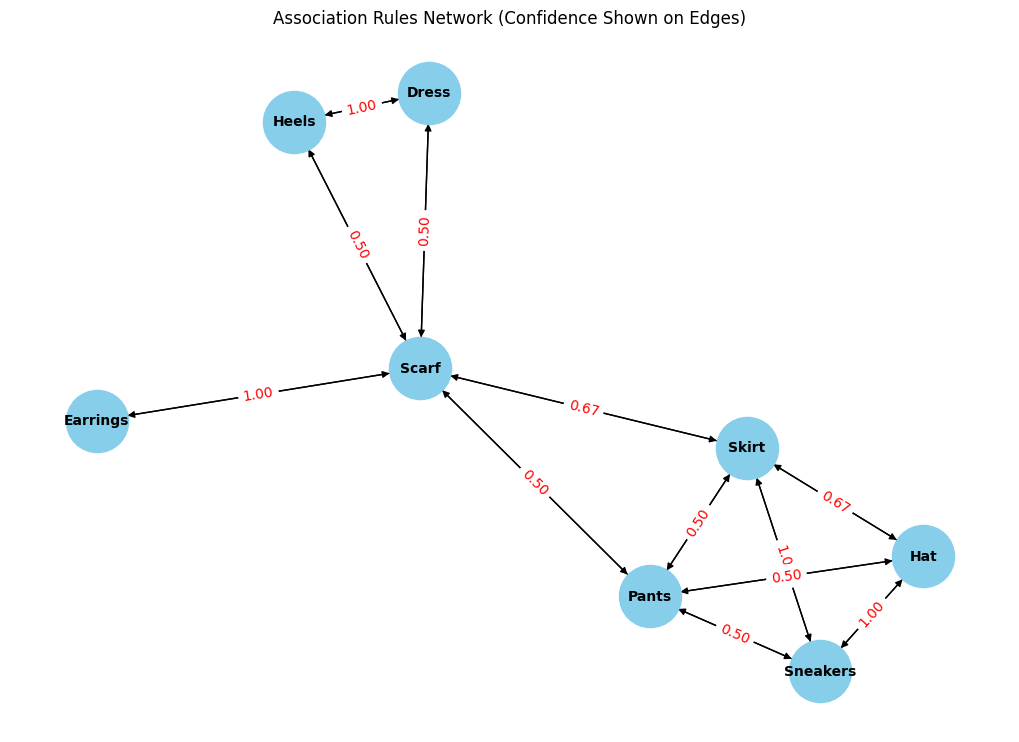

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Visualizing rules as a graph
G = nx.DiGraph()
for _, row in rules.iterrows():
    for a in row['antecedents']:
        for c in row['consequents']:
            G.add_edge(a, c, weight=row['lift'], confidence=row['confidence'])

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)
edge_labels = {(u, v): f"{d['confidence']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Association Rules Network (Confidence Shown on Edges)")
plt.show()

### **Key Observations and Interpretation**

**Strong Associations (Confidence = 1.00)**

- **Dress → Heels:** 100% of customers who bought a Dress also bought Heels.

- **Scarf → Dress:** Every time a Scarf was bought, a Dress was also bought.

- **Hat → Sneakers, Hat → Skirt, Sneakers → Hat:** Are tightly linked, that means they are likely to be bought together.

- **Earrings → Scarf:** Every Earrings purchase was accompanied by a Scarf.

**Moderate Associations**

- **Scarf → Pants (0.50):** Half of the customers who bought a Scarf also bought Pants.

- **Skirt → Hat (0.67):** This shows a good chance of Hat being bought if someone gets a Skirt.

- **Skirt → Scarf (0.67):** Indicates linked purchasing behavior between both items.

### **Market basket optimisation**

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# Loading and preprocessing dataset
try:
    with open("Market_Basket_Optimisation.csv", 'r') as file:
        data = [list(filter(None, line.strip().split(','))) for line in file]
except FileNotFoundError:
    print("File not found. Please make sure the dataset is in the working directory.")

In [ ]:
# Showing sample transactions
for transaction in data[:5]:
    print(transaction)

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
['burgers', 'meatballs', 'eggs']
['chutney']
['turkey', 'avocado']
['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']


In [ ]:
# One-hot encode the transactions
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data, columns=te.columns_)

In [ ]:
# Applying Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

In [ ]:
# Generating association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [ ]:
# Filtering strong rules
strong_rules = rules[(rules['lift'] > 1.2) & (rules['confidence'] > 0.5)]
strong_rules = strong_rules.sort_values(by='lift', ascending=False)

In [ ]:
# Displaying top rules
print("Top Strong Rules:")
strong_rules.head()

Top Strong Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
344,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,1.0,0.005365,1.543848,0.540342,0.040816,0.352268,0.274586
378,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,1.0,0.005822,1.532552,0.537969,0.044385,0.347493,0.274725


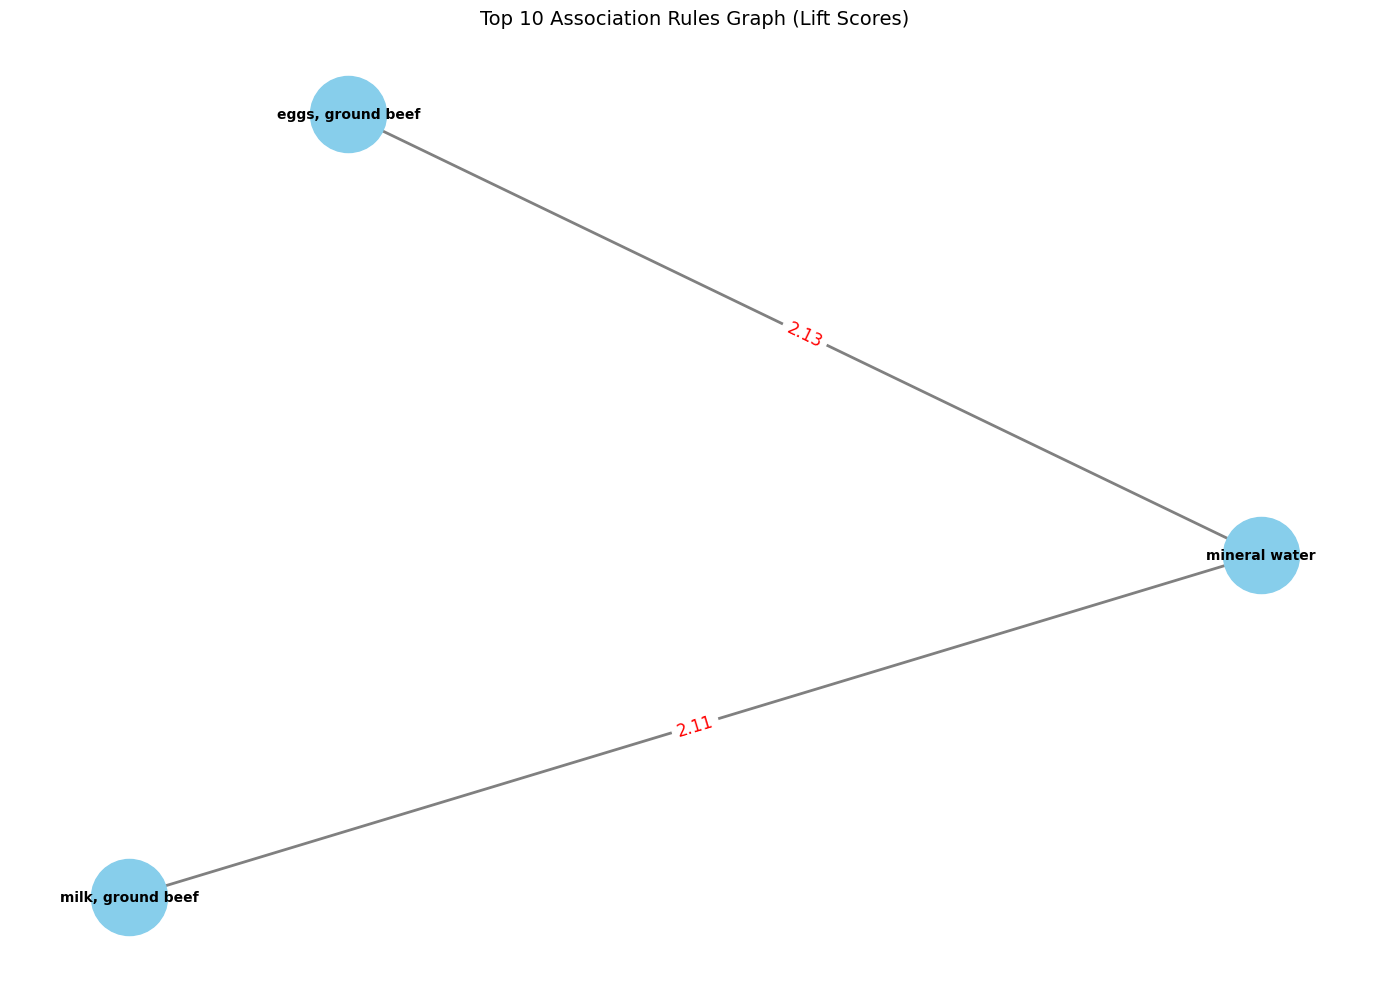

In [ ]:
# Visualization
# Building the graph G from top 10 rules
G = nx.DiGraph()

top_rules = strong_rules.head(10)

for _, row in top_rules.iterrows():
    lhs = ', '.join(row['antecedents'])
    rhs = ', '.join(row['consequents'])
    lift = round(row['lift'], 2)  # Round for clarity
    G.add_edge(lhs, rhs, label=f"{lift}")

# Layout
pos = nx.spring_layout(G, k=2, seed=42)  # Adjust `k` to avoid node clutter

plt.figure(figsize=(14, 10))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=3000)

# Draw edges with arrows
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowstyle='-|>', width=2)

# Draw labels for nodes
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edge labels (Lift scores)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)

plt.title("Top 10 Association Rules Graph (Lift Scores)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

### **Interpretation**

- Lift > 2 for both rules indicates a strong positive association.

- Customers who buy eggs and ground beef are 2.13 times more likely to also purchase mineral water compared to random chance.

- Similarly, milk and ground beef buyers are 2.11 times more likely to buy mineral water.

These rules suggest that certain combinations of core grocery items (especially proteins and dairy) are predictors of mineral water purchases.

### **Strategic Business Plan Based on These Findings**

1. Design a promotional bundle or in-store combo which can be promoted during weekly flyer ads or app deals.

2. Co-locate mineral water near dairy and meat sections to encourage add-on purchases.

3. During sales spikes in eggs or ground beef, prepare for an uptick in mineral water demand. Use this for stock replenishment alerts.

In [3]:
import nbformat

with open("Market_Basket.ipynb") as f:
    nb = nbformat.read(f, as_version=4)

if "widgets" in nb.metadata:
    del nb.metadata["widgets"]

with open("Market_Basket_Optimization.ipynb", "w") as f:
    nbformat.write(nb, f)

The metadata cleanup above was done because of the flickering error (due to complex output) I was getting after uploading my file to GitHub.